# Florida Traffic and Air Quality Index Analysis Notebook

This Python notebook is dedicated for the following steps in CS 132 21.2 project:
- Cleaning and processing traffic and AQI data further
- Exploratory data analysis
- Using linear regression to model the increase in AQI per amount of cars that are added
- Visualizing the data

## Preliminaries

The following external libraries used in this notebook is given by the list below. Make sure that the following are installed in your machine before running subsequent cells. These libraries were installed via `pip`: `pip install <library-name>`
- `pandas`
- `seaborn`

Run the cell below to load all dependencies and libraries

In [1]:
#lahat ng libraries na gagamitin niyo, paki-lagay na lang yung import statements dito
import pandas as pd
import seaborn as sns

## Loading Datasets

We define two dataframe variables, which will be used throughout the duration of this project:
- `traffic_data`: pertains to the traffic data in Florida
- `airq_data`: pertains to the air quality data in Florida

In [2]:
traffic_data = pd.read_csv('florida_traffic_data.csv')
airq_data = pd.read_csv('florida_aqi_data.csv')

In [3]:
traffic_data.head()

,01/01,01/02,01/03,01/04,01/05,01/06,01/07,01/08,01/09,01/10,...,06/29,06/30,07/01,07/02,07/03,07/04,07/05,07/06,07/07,COUNTY
0,93577,130263,137751,110805,101379,120925,117384,122200,125525,133191,...,98897,99327,102682,111925,103217,71816,81094,99167,96529,Charlotte
1,27107,42907,45616,33070,32908,41046,43203,44375,45091,47476,...,35886,38459,43349,46666,45621,34863,31295,40701,42047,Citrus
2,236551,325565,338452,284312,264567,314038,304515,310861,318654,335605,...,216490,214114,220510,234920,218501,147360,165241,213985,207772,Collier
3,15620,22611,24145,18099,18292,22028,21675,22571,23220,25535,...,18203,18602,18885,20446,18055,12816,14553,18841,17845,Desoto
4,3437,4675,5495,3620,3310,4655,4581,4488,4883,5273,...,3963,3847,4235,4159,3614,2638,2901,3808,3913,Glades


In [4]:
airq_data.head()

,county Name,Date,AQI,Defining Parameter
0,Alachua,01/03,35,PM2.5
1,Alachua,01/08,52,PM2.5
2,Alachua,01/09,48,PM2.5
3,Alachua,01/11,38,PM2.5
4,Alachua,01/12,37,PM2.5


# PART 1: Preprocessing Data

There are only certain counties that have been recorded by the air quality data of Florida. We can then filter the traffic data so that it can be consistent with the recorded counties of the air quality data.

In [5]:
#determine counties in the air quality data
county_airq = airq_data['county Name'].unique()

county_airq

array(['Alachua', 'Baker', 'Bay', 'Brevard', 'Broward', 'Citrus',
       'Collier', 'Columbia', 'Duval', 'Escambia', 'Hamilton',
       'Hillsborough', 'Holmes', 'Lee', 'Leon', 'Marion', 'Martin',
       'Miami-Dade', 'Nassau', 'Orange', 'Palm Beach', 'Pinellas', 'Polk',
       'Santa Rosa', 'Sarasota', 'Seminole', 'Volusia', 'Wakulla'],
      dtype=object)

In [6]:
#determine counties in traffic data
county_traffic = traffic_data['COUNTY'].unique()

county_traffic

array(['Charlotte', 'Citrus', 'Collier', 'Desoto', 'Glades', 'Hendry',
       'Hernando', 'Highlands', 'Hillsborough', 'Lake', 'Lee', 'Manatee',
       'Pasco', 'Pinellas', 'Polk', 'Sarasota', 'Sumter', 'Alachua',
       'Baker', 'Bradford', 'Columbia', 'Dixie', 'Hamilton', 'Lafayette',
       'Levy', 'Madison', 'Marion', 'Suwannee', 'Taylor', 'Bay',
       'Calhoun', 'Escambia', 'Franklin', 'Gadsden', 'Gulf', 'Holmes',
       'Jackson', 'Jefferson', 'Leon', 'Liberty', 'Okaloosa',
       'Santa Rosa', 'Wakulla', 'Walton', 'Washington', 'Brevard', 'Clay',
       'Duval', 'Flagler', 'Nassau', 'Orange', 'Putnam', 'Seminole',
       'St. Johns', 'Volusia', 'Broward', 'Miami-Dade', 'Indian River',
       'Martin', 'Monroe', 'Osceola', 'Palm Beach', 'St. Lucie',
       "Florida's Turnpike"], dtype=object)

In [7]:
#determine counties that are common for both datasets
common_counties = list(set(county_airq).intersection(set(county_traffic)))

print(common_counties)

['Martin', 'Duval', 'Lee', 'Volusia', 'Marion', 'Orange', 'Palm Beach', 'Miami-Dade', 'Brevard', 'Escambia', 'Seminole', 'Bay', 'Hillsborough', 'Alachua', 'Leon', 'Columbia', 'Hamilton', 'Broward', 'Wakulla', 'Nassau', 'Santa Rosa', 'Baker', 'Holmes', 'Citrus', 'Pinellas', 'Collier', 'Polk', 'Sarasota']


The variable `common_counties` represent counties in Florida that are common for both air quality and traffic data. We could now filter both the traffic and air quality data according to their common counties, represented by the `common_counties` variable.

In [8]:
traffic_data = traffic_data[traffic_data['COUNTY'].isin(common_counties)]

traffic_data.sort_values('COUNTY', inplace = True)
traffic_data

,01/01,01/02,01/03,01/04,01/05,01/06,01/07,01/08,01/09,01/10,...,06/29,06/30,07/01,07/02,07/03,07/04,07/05,07/06,07/07,COUNTY
17,114200,154629,166054,151168,146477,138321,128157,127949,134169,147862,...,125297,122412,131997,143193,137491,90080,118842,131855,120127,Alachua
18,2071,2796,3081,2526,2375,2565,2627,2745,2853,3272,...,2965,2929,3014,3288,3183,2641,2550,2857,2707,Baker
29,92354,139450,141158,111372,91151,139712,144079,144889,145925,154921,...,138276,154222,139730,166732,155771,124145,123179,133025,145192,Bay
45,261851,367668,401305,332429,299054,346140,321507,325505,332772,370856,...,287127,291592,295687,320577,305800,215883,242171,281311,275538,Brevard
55,654055,855843,900897,785596,702080,873355,902844,893983,908921,925687,...,715555,734498,736393,764052,712455,522985,494879,697840,709431,Broward
1,27107,42907,45616,33070,32908,41046,43203,44375,45091,47476,...,35886,38459,43349,46666,45621,34863,31295,40701,42047,Citrus
2,236551,325565,338452,284312,264567,314038,304515,310861,318654,335605,...,216490,214114,220510,234920,218501,147360,165241,213985,207772,Collier
20,117423,148119,159311,147044,140417,110480,96994,97715,104840,119029,...,115280,108944,122022,144884,139546,87239,136401,126308,105119,Columbia
47,359461,572172,602746,453034,391058,546093,553083,558678,563886,590374,...,318008,405390,426355,445997,455776,322478,335327,471132,471482,Duval
31,171980,264689,274006,229805,187136,265397,268369,269910,276625,286133,...,242656,246983,254142,290255,267312,196559,198003,253754,245818,Escambia


In [9]:
airq_data = airq_data[airq_data['county Name'].isin(common_counties)]

airq_data

,county Name,Date,AQI,Defining Parameter
0,Alachua,01/03,35,PM2.5
1,Alachua,01/08,52,PM2.5
2,Alachua,01/09,48,PM2.5
3,Alachua,01/11,38,PM2.5
4,Alachua,01/12,37,PM2.5
...,...,...,...,...
2156,Wakulla,06/29,60,PM2.5
2157,Wakulla,06/30,58,PM2.5
2158,Wakulla,07/01,54,PM2.5
2159,Wakulla,07/02,64,PM2.5


# PART 2: Exploratory Data Analysis

Both air quality and traffic data from selected counties in Florida state have been preprocessed/cleaned. We can then visualize the trends both in traffic and air quality data in selected counties in Florida.

## PART 2.1: Filtering DataFrame by County

We can then filter our dataframes according to a specific county. Let us define a function `filter_data` that performs the following tasks:
- Filter the air quality dataset to a specified county
- Filter the traffic dataset to a specified county
- Filter recorded dates, since there are particular dates that are not present in the traffic data or air quality data
- Combine datasets into a single dataframe

In [10]:
def filter_data(traffic, air_quality, county):
    temp1 = air_quality[air_quality['county Name'] == county]
    temp2 = traffic[traffic['COUNTY'] == county]
    
    date1 = list(temp2.columns[1:])
    date2 = list(temp1['Date'])
    
    common_dates = list(set(date1).intersection(set(date2)))
    common_dates.sort()
    
    temp1 = temp1[temp1['Date'].isin(common_dates)]
    temp2 = temp2[common_dates]
    to_return = temp1[['Date', 'AQI']].copy(deep = True)
    
    tem_lis = []
    for i in common_dates:
        tem_lis.append(temp2[i].values[0])
    
    to_return['traffic_volume'] = tem_lis
    to_return = to_return.reset_index(drop = True)
    
    return to_return

We can test our newly-created function to a specific county. **For the cells below, you can change the value of `county` variable and run the cell to see the results for a specific county.** You may check for the list of common counties in both datasets by looking at the `common_counties` variable.

In [11]:
print(common_counties)

['Martin', 'Duval', 'Lee', 'Volusia', 'Marion', 'Orange', 'Palm Beach', 'Miami-Dade', 'Brevard', 'Escambia', 'Seminole', 'Bay', 'Hillsborough', 'Alachua', 'Leon', 'Columbia', 'Hamilton', 'Broward', 'Wakulla', 'Nassau', 'Santa Rosa', 'Baker', 'Holmes', 'Citrus', 'Pinellas', 'Collier', 'Polk', 'Sarasota']


In [45]:
#You may change the county variable according to a value in the common_counties variable
county = "Brevard"

test_var = filter_data(traffic_data, airq_data, county)

test_var

,Date,AQI,traffic_volume
0,01/03,34,401305
1,01/10,50,370856
2,01/11,56,305403
3,01/12,55,273233
4,01/13,48,335090
5,01/14,39,320943
6,01/19,40,283652
7,01/22,40,318234
8,01/30,45,342426
9,01/31,38,385913


## PART 2.2: Exploring the Correlation Between Traffic and AQI

The `.corr()` method of `pandas` returns a dataframe that measures the correlation between two or more different variables. We want to know specifically how well-correlated the traffic data and AQI are for all common counties. Let us define a function `corr_measure` that returns the correlation value between the traffic data and AQI using Pearson's correlation coefficient.

The values of the correlation coefficient determine the strength of association between the two variables. The table below shows the scale of correlation based on their Pearson's correlation coefficient.

|Scale of correlation coefficient| Value |
|--------------------------------|-------|
| $0<r \leq 0.19$                |Very Low|
|$0.2 \leq r \leq 0.39$          |Low|
|$0.4 \leq r \leq 0.59$          |Moderate|
|$0.6 \leq r \leq 0.79$          |High|
|$0.8 \leq r \leq 1.0$           |Very High|

In [75]:
def corr_measure(x_axis, y_axis, src):
    temp = src[[x_axis, y_axis]].corr()
    correlation_value = temp.iloc[0][1]
    str = ""
    
    if 0.8 <= abs(correlation_value) <= 1.0:
        str = "very high"
    elif 0.6 <= abs(correlation_value) <= 0.79:
        str = "high"
    elif 0.4 <= abs(correlation_value) <= 0.59:
        str = "moderate"
    elif 0.2 <= abs(correlation_value) <= 0.39:
        str = "low"
    elif 0 <= abs(correlation_value) <= 0.19:
        str = "very low"
    
    if correlation_value > 0:
        str += " positive relationship"
    elif correlation_value < 0:
        str += " negative relationship"
    
    return temp.iloc[0][1], str

We then iterate the function over all common counties to determine the strength of the correlation of traffic data and AQI, and sort the results according to the absolute value of their correlation value.

In [76]:
results = []

for i in common_counties:
    test_df = filter_data(traffic_data, airq_data, i)
    con, cor_stat = corr_measure('traffic_volume', 'AQI', test_df)
    results.append((i, con, cor_stat))

In [83]:
results.sort(key = lambda x: abs(x[1]), reverse = True)

for i in range(5):
    print(results[i])

('Leon', -0.43795223059571814, 'moderate negative relationship')
('Pinellas', -0.4143257330217335, 'moderate negative relationship')
('Lee', -0.40905459295589935, 'moderate negative relationship')
('Brevard', -0.3759101195122419, 'low negative relationship')
('Collier', -0.29788094632917805, 'low negative relationship')


The top 5 counties with the strongest correlation among all common counties have moderate to low relationships.

## PART 2.3: Scatterplots of Top 5 Counties in Terms of Correlation Coefficient

Let us define a function `scatplot` that generates a scatterplot for the traffic and AQI data of a county. The scatterplot was generated using `seaborn`.

In [86]:
def scatplot(x_axis, y_axis, src, county):
    sns.lmplot(x = x_axis, y = y_axis, data = src).set(title='Scatterplot of Traffic vs. AQI Data for {0}'.format(county))

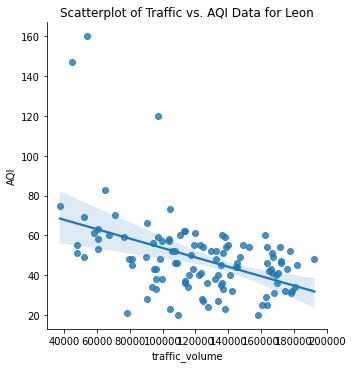

In [87]:
#scatterplot for Leon
leon_df = filter_data(traffic_data, airq_data, "Leon")
scatplot("traffic_volume", "AQI", leon_df, "Leon")

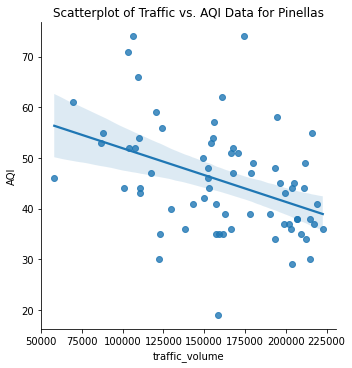

In [88]:
#scatterplot for Pinellas
leon_df = filter_data(traffic_data, airq_data, "Pinellas")
scatplot("traffic_volume", "AQI", leon_df, "Pinellas")

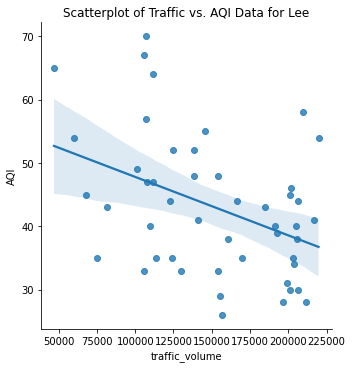

In [89]:
#scatterplot for Leon
leon_df = filter_data(traffic_data, airq_data, "Lee")
scatplot("traffic_volume", "AQI", leon_df, "Lee")

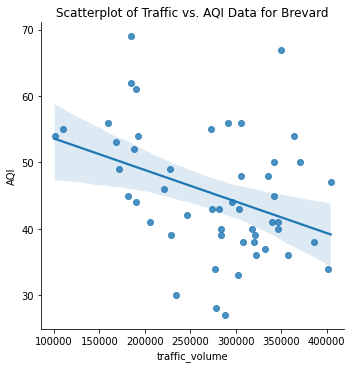

In [90]:
#scatterplot for Leon
leon_df = filter_data(traffic_data, airq_data, "Brevard")
scatplot("traffic_volume", "AQI", leon_df, "Brevard")

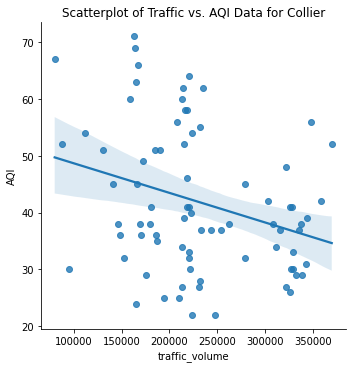

In [91]:
#scatterplot for Leon
leon_df = filter_data(traffic_data, airq_data, "Collier")
scatplot("traffic_volume", "AQI", leon_df, "Collier")

## PART 2.4: Analysis of Correlation and Preparation for Modelling